/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


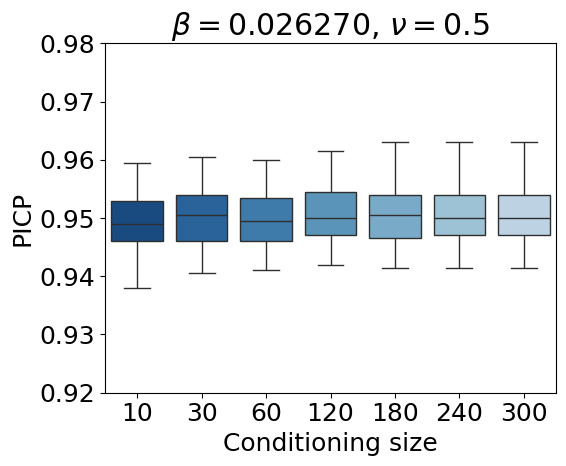

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


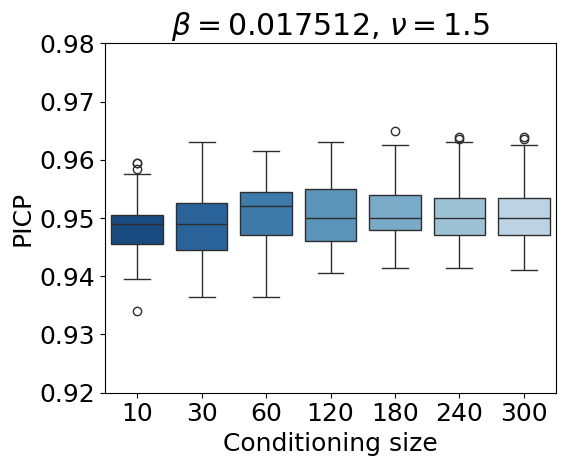

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


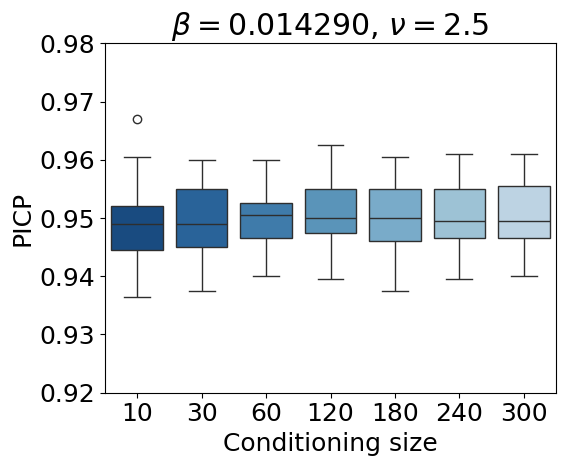

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


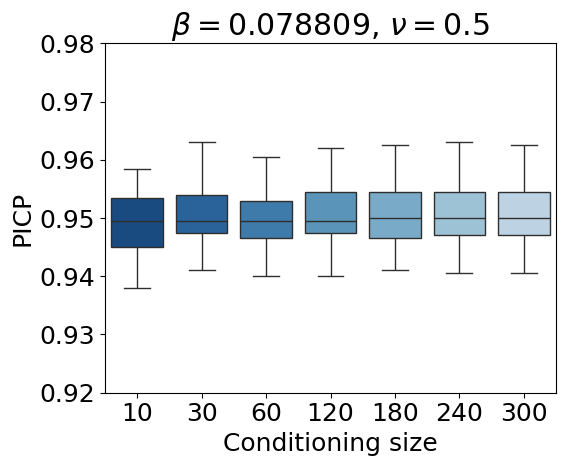

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


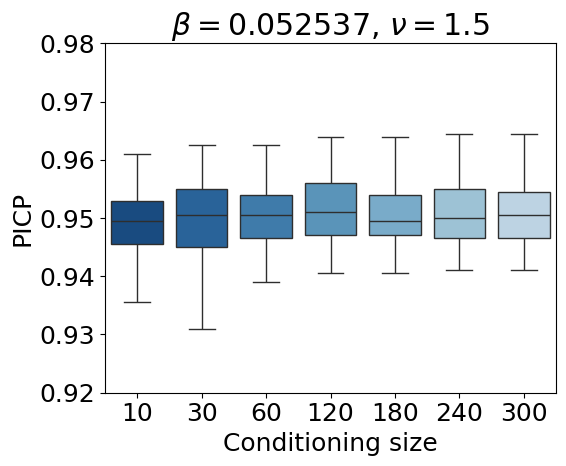

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


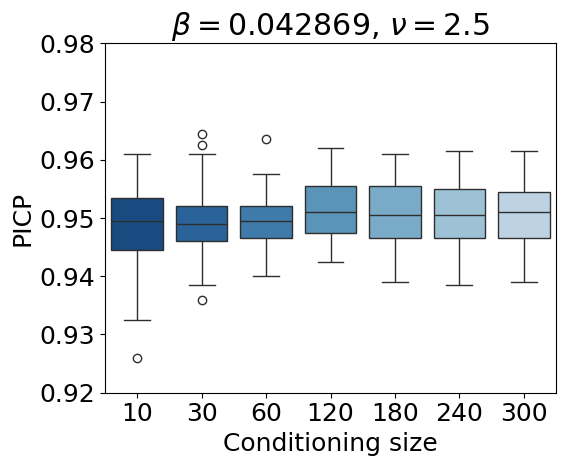

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


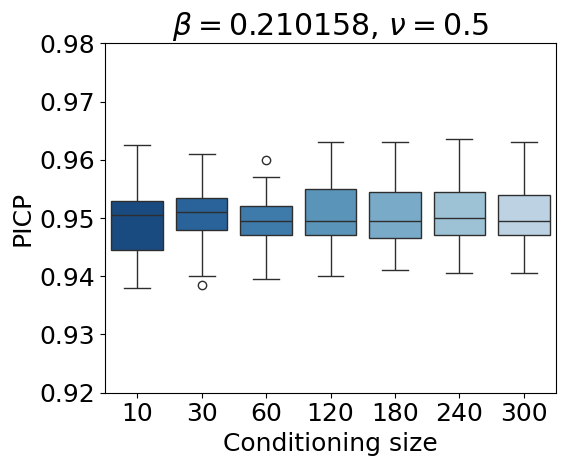

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


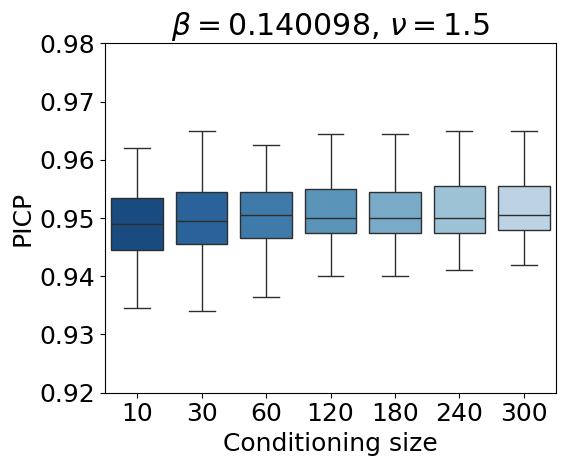

/tmp/ipykernel_38821/3435688375.py:48: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)


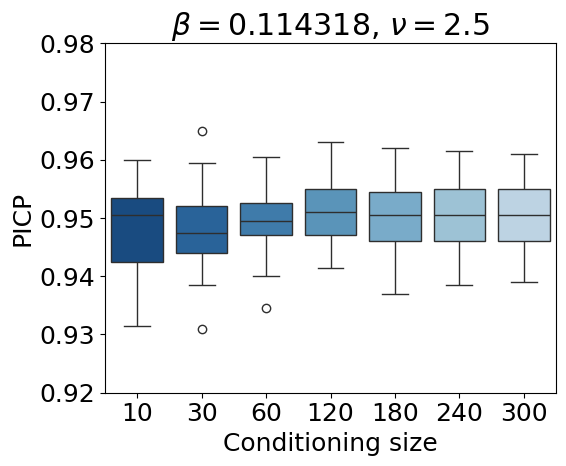

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import glob

plt.rcParams['font.size'] = 18  # You can set any numeric value here

def process_file(file_path):
    df = pd.read_csv(file_path)
    
    # Calculate confidence intervals
    z_score = stats.norm.ppf(0.975)  # 95% confidence interval
    ci_lower = df['smean'] - z_score * np.sqrt(df['svariance'])
    ci_upper = df['smean'] + z_score * np.sqrt(df['svariance'])
    
    # Check if true value is within the confidence interval
    covered = (df['true_value'] >= ci_lower) & (df['true_value'] <= ci_upper)
    
    coverage_rate = covered.mean()
    return coverage_rate

def process_all_files(beta, nu):
    m_values = [10, 30, 60, 120, 180, 240, 300] #, 
    results = {m: [] for m in m_values}
    
    for m in m_values:
        for seed in range(50):
            file_pattern = f"./log/pred_simu_{beta}_{nu}/conditional_simulation_k_{k}_m_{m}_theta_{sigma}_{beta}_{nu}_seed_{seed}.csv"
            matching_files = glob.glob(file_pattern)
            
            if matching_files:
                file_path = matching_files[0]
                coverage_rate = process_file(file_path)
                results[m].append(coverage_rate)
    
    return results

def plot_results(results, b, n):
    plt.figure(figsize=(6, 5))
    
    # Create a color palette with gradual blues
    num_boxes = len(results)
    colors = plt.cm.Blues(np.linspace(0.9, 0.3, num_boxes))
    
    # Use the color palette in the boxplot
    sns.boxplot(data=[results[m] for m in results.keys()], palette=colors)
    
    plt.xticks(range(len(results)), results.keys())
    plt.xlabel('Conditioning size')
    plt.ylabel('PICP')
    plt.ylim(0.92, 0.98)
    plt.title(r'$\beta = $' + b[:] + r', $\nu = $' + n[:3])
    plt.tight_layout()
    plt.savefig(f'./fig/simu/coverage_rate_boxplot_{b}_{n}.pdf')
    plt.show()

k = 200 # 1000 for classic
sigma = "1.500000"
beta = ["0.026270", "0.017512", "0.014290", "0.078809", "0.052537", "0.042869", "0.210158", "0.140098", "0.114318"]
nu = ["0.500000", "1.500000", "2.500000", "0.500000", "1.500000", "2.500000", "0.500000", "1.500000", "2.500000"]

# Main execution
for i, (b, n) in enumerate(zip(beta, nu)):
    results = process_all_files(b, n)
    plot_results(results, b, n)

# # Print average coverage rates
# for m, rates in results.items():
#     print(f"Average coverage rate for m={m}: {np.mean(rates):.4f}")